In [ ]:
dataset_path = "/Users/manojamme/Downloads/archive/seed_iv"


# start

# Transfer Learning to extract feature vector and rearranging those feature vectors into 8*9 map

# CNN

In [267]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [ ]:

# import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [268]:
print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available 0


In [ ]:
# we have already extrcated features with transfer learning and are saved in file seed4_extract_TL_features_inception_v3.py, 
# we will use those fetures which are already arranged in 8x9 map as an image to a cnn model.

# k5 128

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
# %reset -f

In [269]:
dataset_path = "./drive/MyDrive/seed_4"

In [270]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.layers import Input, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, Dropout
from keras.layers import Flatten, Dense, Concatenate, Reshape, LSTM
from keras.models import Sequential, Model

from keras.regularizers import l2

from sklearn.metrics import confusion_matrix,  classification_report, f1_score, precision_score, recall_score

import keras
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from keras import backend as K
import time
from sklearn.model_selection import StratifiedKFold

import seaborn as sns

In [271]:
import gc

In [272]:
import numpy as np
from keras.utils import to_categorical

# Define constants
num_classes = 4
batch_size = 64
img_rows, img_cols, fft_length, num_chan = 8, 9, 2048, 1


In [273]:
#num_classes = 4
#batch_size = 64
#img_rows, img_cols, fft_length, num_chan = 8, 9, 2048, 1

In [274]:
i = 1

# X = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/{i}_{i}_X_1D.npy")
for exp in range(1,4):
  y = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
  print(y.shape)


(960, 8, 9, 2048)
(960, 8, 9, 2048)
(960, 8, 9, 2048)


In [ ]:
# i = 1

# # X = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/{i}_{i}_X_1D.npy")
# for exp in range(1,4):
#   temp = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/hop_12/TL_inception_v3/{i}_{exp}_X89.npy")
#   print(temp.shape)



In [275]:
i = 1
y = []
for exp in range(1,4):
  temp_y = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
  for label in temp_y:
    y.append(label)

In [276]:
temp = None

In [277]:
c = gc.collect()
print(c)

3567


In [278]:
y = np.array(y)

In [279]:
y.shape

(2880, 8, 9, 2048)

In [ ]:
# subject = 2
# exp_id = 3

# x89 = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/TL_mobilenet_v2/{subject}_{exp_id}_X89.npy")

In [ ]:
# x89.shape

In [280]:
y.shape

(2880, 8, 9, 2048)

In [281]:
import numpy as np
from keras.utils import to_categorical

# Simulate or define `y` array
# Example: Replace this with your actual `y` array
y = np.random.randint(0, 6, size=1126)  # Simulated data with values 0 to 5

# Reshape and create one_y_1
one_y_1 = np.array([y[:]] * 1).reshape((-1,))

# Debug: Check type and values
print("Type of one_y_1 before processing:", type(one_y_1))
print("Dtype of one_y_1 before processing:", one_y_1.dtype)

# Ensure integer type
##one_y_1 = one_y_1.astype(int)

# Check if all values are within range
if np.max(one_y_1) >= num_classes:
    print(f"Adjusting num_classes to accommodate maximum value { np.max(one_y_1)} in one_y_1")
    num_classes = np.max(one_y_1) + 1

# Convert to categorical
one_y_1 = to_categorical(one_y_1, num_classes)

# Debug output
print("First 10 rows of one_y_1 after to_categorical:")
print(one_y_1[:10])


Type of one_y_1 before processing: <class 'numpy.ndarray'>
Dtype of one_y_1 before processing: int64
Adjusting num_classes to accommodate maximum value 5 in one_y_1
First 10 rows of one_y_1 after to_categorical:
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
#one_y = np.array([y[:1697]] * 3).reshape((-1,))
#one_y = to_categorical(one_y, num_classes)
#one_y_1 = np.array([y[:]]*1).reshape((-1,))
#print(one_y_1.shape)
#for i in range(3378):
   #if one_y_1[i] != y[(i%1126)]:
     #print("break")
     #break
#print(one_y_1[0:10])
#print(np.unique(one_y_1, return_counts= True))
#one_y_1 = to_categorical(one_y_1, num_classes)
#print(one_y_1[0:10])


In [282]:
gc.collect()

0

In [283]:
# Example data creation
num_samples_per_experiment = 1126
num_experiments = 3
total_samples = num_samples_per_experiment * num_experiments

# Assuming y is the label array
one_y = np.array([y[:num_samples_per_experiment]]
                 * num_experiments).reshape(-1)

# Check the unique values before clipping
print("Unique values in one_y before clipping:", np.unique(one_y))

# Clip values to ensure they are within the range [0, 3]
if np.max(one_y) >= 4:
    print("Clipping values in one_y to [0, 3]")
    one_y = np.clip(one_y, 0, 3)

# Check the unique values again after clipping
print("Unique values in one_y after clipping:", np.unique(one_y))

# Convert to categorical format
one_y = to_categorical(one_y, num_classes=4)

# Ensure falx also has the correct number of samples
falx = np.empty((0, 8, 9, 2048))
for exp_id in range(1, num_experiments + 1):
    # Example file loading
    temp = np.load(
        '/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
    falx = np.vstack([falx, temp])

# Now they should have the same number of samples
print("falx shape:", falx.shape)  # Should match total_samples
print("one_y shape:", one_y.shape)  # Should match total_samples

# Ensure falx and one_y have the same number of samples
min_samples = min(falx.shape[0], one_y.shape[0])
falx = falx[:min_samples]
one_y = one_y[:min_samples]

# Check their shapes
print("After adjustment:")
print("falx shape:", falx.shape)
print("one_y shape:", one_y.shape)

# Proceed with model training
kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
for k, (train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
    x_train, x_test = falx[train], falx[test]
    y_train, y_test = one_y[train], one_y[test]

    # Train your model


Unique values in one_y before clipping: [0 1 2 3 4 5]
Clipping values in one_y to [0, 3]
Unique values in one_y after clipping: [0 1 2 3]
falx shape: (2880, 8, 9, 2048)
one_y shape: (3378, 4)
After adjustment:
falx shape: (2880, 8, 9, 2048)
one_y shape: (2880, 4)


In [ ]:
##k_in_kfold = 5
##batch = 128

##acc_list = []
##std_list = []
##all_acc = []
##acc_log = {}
##flag_for_model_summary = 0
# with tf.device('/device:GPU:0'):
##for subject in range(11,16):  # 15 models for 15 subjects, no inter subject training, only intra subject
   ## K.clear_session()
   ## start = time.time()
    ##falx = np.empty((0, 8, 9, 2048))
    ##gc.collect()
    ##for exp_id in range(1,4):
      ##temp = np.load("/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy")
      ##falx = np.vstack([falx, temp])
      ##temp = None

#     one_falx_1 = falx#.reshape(1008, 8, 9, 1280)

    # ###============= random select ============####
    # permutation = np.random.permutation(one_y_1.shape[0])
    # one_falx_2 = one_falx_1[permutation, :]
    # one_falx = one_falx_2[0:3400]
    # one_y_2 = one_y_1[permutation, :]
    # one_y = one_y_2[0:3400]
    # ###============= random select ============####
    ##one_y = one_y_1
#     one_falx = one_falx_1[:,:,:,:]
    
    ##print(one_y.shape)
    ##print(falx.shape)
    # x_train, x_test, y_train, y_test = train_test_split(one_falx, one_y, test_size=0.25)
    ##seed = 7
   ## np.random.seed(seed)
   ## kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
    ##cvscores = []


    # create model
    ##for k,(train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
      ##  img_size = (img_rows, img_cols, 2880)


        ##def create_base_network(input_dim):

         ##   seq = Sequential()
          ##  seq.add(Conv2D(16, 3, activation='relu', padding='same', name='conv1',
            ##               input_shape=input_dim))#, kernel_regularizer=keras.regularizers.l2(0.001)))
            ##seq.add(Conv2D(32, 2, activation='relu', padding='same', name='conv2'))#, kernel_regularizer=keras.regularizers.l2(0.001)))
            # seq.add(Conv3D(32, 3, activation='relu', padding='same', name='conv3'))
            ##seq.add(Conv2D(8, 1, activation='relu', padding='same', name='conv4'))
            ##seq.add(MaxPooling2D(2, 2, name='pool1'))
            ##seq.add(Flatten(name='fla1'))
            ##seq.add(Dense(16, activation='relu', name='dense1'))#, kernel_regularizer=keras.regularizers.l2(0.01)))
#             seq.add(Reshape((1, 64), name='reshape'))

            ##return seq




        ##base_network = create_base_network(img_size)
        ##input_1 = Input(shape=img_size)
#         input_2 = Input(shape=img_size)
#         input_3 = Input(shape=img_size)
#         input_4 = Input(shape=img_size)
#         input_5 = Input(shape=img_size)
#         input_6 = Input(shape=img_size)



#         out_all = Concatenate(axis=1)(base_network(input_1))
#         lstm_layer = LSTM(32, name='lstm')(out_all)
        ##out_layer = Dense(4, activation='softmax', name='out')(base_network(input_1))
        ##model = Model(input_1, out_layer)
        # model.summary()
       ## if flag_for_model_summary==0:
         ## print(model.summary())
         ## flag_for_model_summary = 1

        # Compile model
        ##model.compile(loss=keras.losses.categorical_crossentropy,
                    ##  optimizer=tf.keras.optimizers.Adam(),
                    ##  metrics=['accuracy'])
        # Fit the model
       ## x_train = falx[train]
       ##  y_train = one_y[train]

       ## x_test = falx[test]
       ## y_test = one_y[test]

       ## history = model.fit(x_train, y_train,
                           ## validation_data=(x_test, y_test),
                            ##epochs=150, batch_size=batch, verbose=0,
                            ##callbacks=[
                                       ##   tf.keras.callbacks.EarlyStopping(
                                        ##      monitor='val_accuracy',
                                         ##     patience=30,
                                          ##    restore_best_weights=True
                                       ##   )
##plt.plot(history.history['accuracy'], label='acc (training data)')
##plt.plot(history.history['val_accuracy'],
         ##label='acc (validation data)')
##plt.plot(history.history['loss'], label='loss (training data)')
##plt.plot(history.history['val_loss'], label='loss (validation data)')
##plt.title('training visualisation')
##plt.ylabel('Value')
##plt.xlabel('No. epoch')
##plt.legend()
##plt.tight_layout()
##plt.show()  # ]


               ##scores = model.evaluate(x_test, y_test, verbose=0)

        ##print("%.2f%%" % (scores[1] * 100)) # Accuracy
        ##all_acc.append(scores[1] * 100)

        ##y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))
        ##cm = confusion_matrix(y_test.argmax(1), y_pred)
        ##clr = classification_report(y_test.argmax(1), y_pred, target_names=(["0","1","2","3"]))
        ##plt.figure(figsize=(7, 7))
        ##sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
       ## plt.xticks(np.arange(4) + 0.5, (["0","1","2","3"]))
       ## plt.yticks(np.arange(4) + 0.5, (["0","1","2","3"]))
       ## plt.xlabel("Predicted")
       ## plt.ylabel("Actual")
       ## plt.title("Confusion Matrix")
       ## plt.show()
       ## print("Classification Report:\n----------------------\n", clr)

        ##print(f"subject_no.:{subject}'s kfold:{k+1} completed")


    # print("all acc: {}".format(all_acc))
    ##print("mean acc: {}".format(np.mean(all_acc)))
    ##print("std acc: {}".format(np.std(all_acc)))
    ##acc_list.append(np.mean(all_acc))
    ##std_list.append(np.std(all_acc))
    ##print("subject_no.： {}".format(subject))
    ##acc_log[subject]  = all_acc
    ##all_acc = []
    ##end = time.time()
    ##print("%.2f" % (end - start))   # run time

In [284]:
acc_list

[]

In [285]:
std_list

[]

In [286]:
acc_log

{}

In [287]:
acc_list

[]

In [288]:
std_list

[]

In [289]:
acc_log

{}

Before clipping: [0 1 2 3]
After clipping: [0 1 2 3]
falx shape: (2880, 8, 9, 2048)
one_y shape: (2880, 4)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8, 9, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 16)             │       299,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,404 (1.14 MB)

 Trainable params: 299,404 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

None


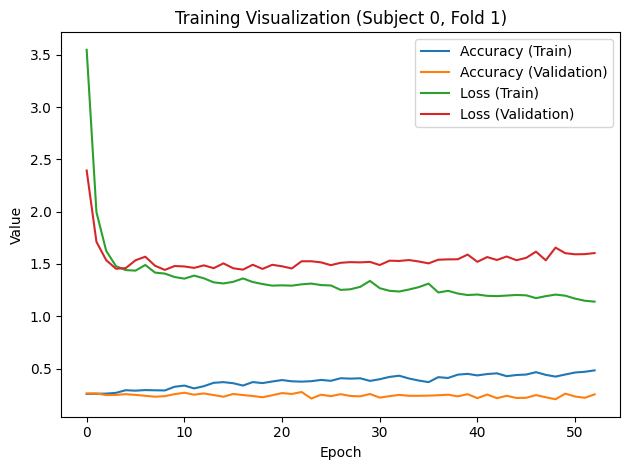

Accuracy for fold 1: 27.60%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


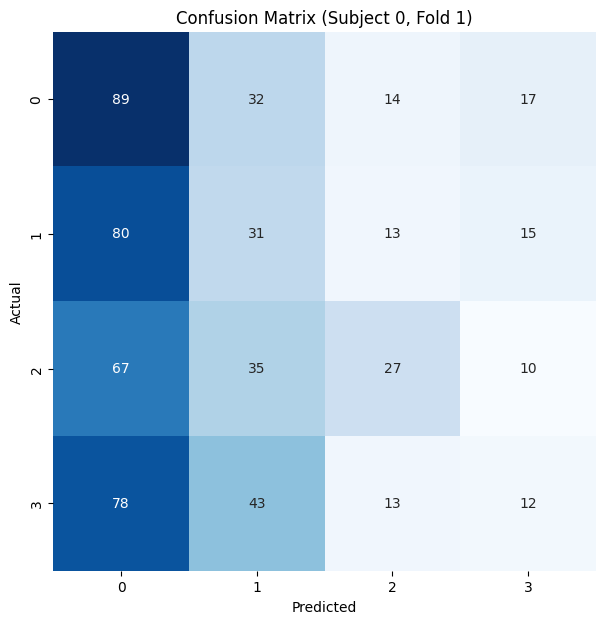

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.28      0.59      0.38       152
           1       0.22      0.22      0.22       139
           2       0.40      0.19      0.26       139
           3       0.22      0.08      0.12       146

    accuracy                           0.28       576
   macro avg       0.28      0.27      0.25       576
weighted avg       0.28      0.28      0.25       576



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


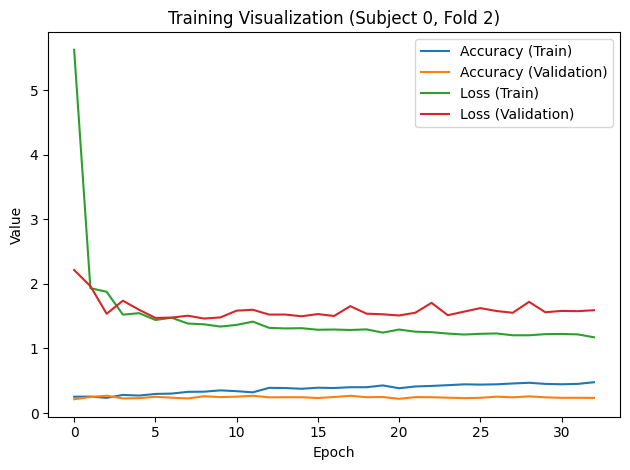

Accuracy for fold 2: 26.91%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


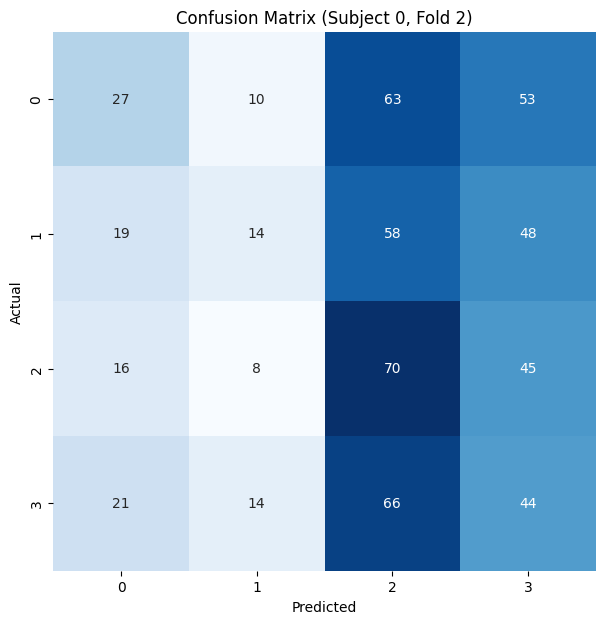

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.33      0.18      0.23       153
           1       0.30      0.10      0.15       139
           2       0.27      0.50      0.35       139
           3       0.23      0.30      0.26       145

    accuracy                           0.27       576
   macro avg       0.28      0.27      0.25       576
weighted avg       0.28      0.27      0.25       576



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


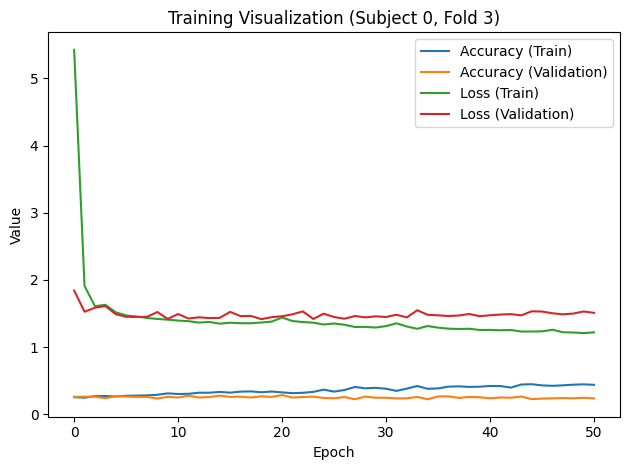

Accuracy for fold 3: 28.47%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


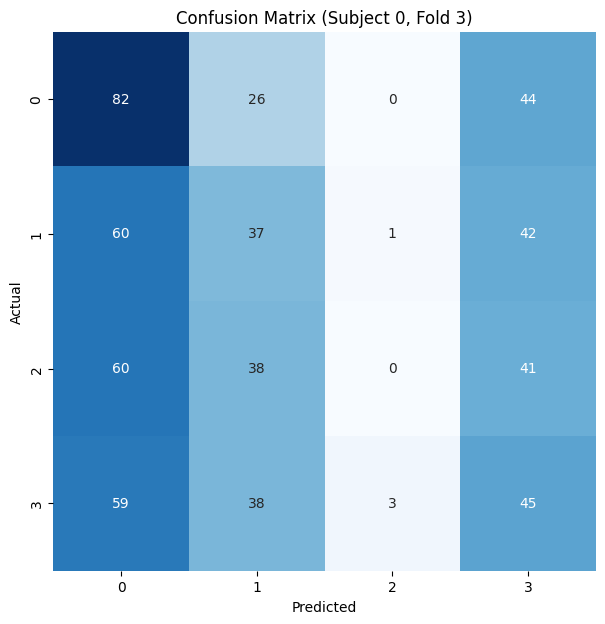

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.31      0.54      0.40       152
           1       0.27      0.26      0.27       140
           2       0.00      0.00      0.00       139
           3       0.26      0.31      0.28       145

    accuracy                           0.28       576
   macro avg       0.21      0.28      0.24       576
weighted avg       0.21      0.28      0.24       576



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


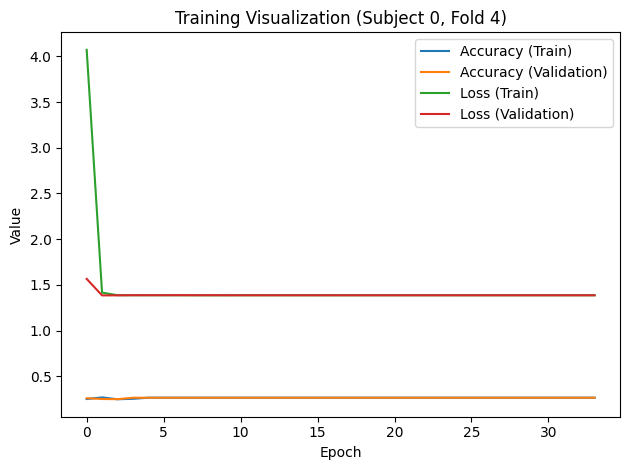

Accuracy for fold 4: 26.39%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

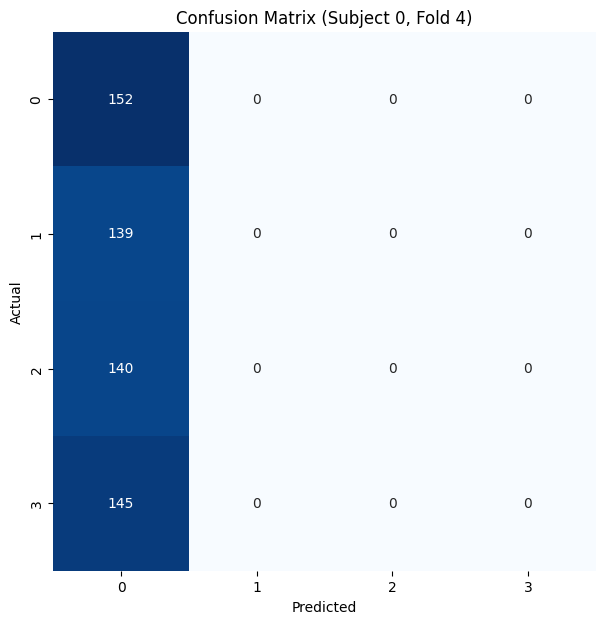

Classification Report for Fold 4:
              precision    recall  f1-score   support

           0       0.26      1.00      0.42       152
           1       0.00      0.00      0.00       139
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       145

    accuracy                           0.26       576
   macro avg       0.07      0.25      0.10       576
weighted avg       0.07      0.26      0.11       576



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


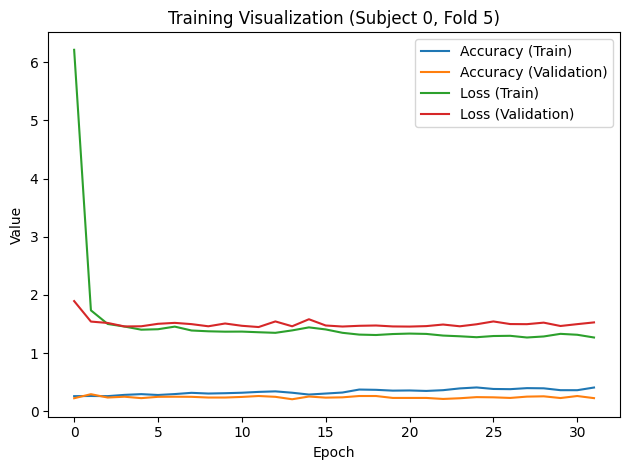

Accuracy for fold 5: 29.51%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


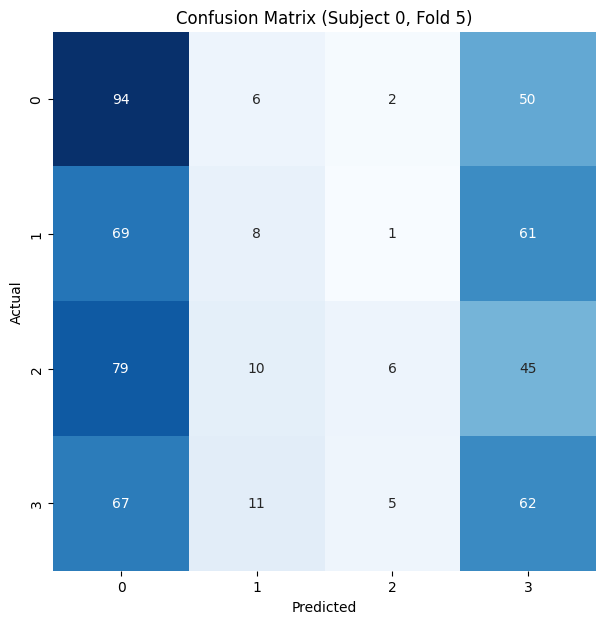

Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.30      0.62      0.41       152
           1       0.23      0.06      0.09       139
           2       0.43      0.04      0.08       140
           3       0.28      0.43      0.34       145

    accuracy                           0.30       576
   macro avg       0.31      0.29      0.23       576
weighted avg       0.31      0.30      0.23       576

Mean Accuracy for Subject 0: 27.78%
Standard Deviation for Subject 0: 1.11%
Subject 0 completed in 729.69 seconds.
Final Accuracy List: [np.float64(27.777777314186096)]
Final Std Deviation List: [np.float64(1.1143616784884225)]


In [298]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # Corrected import
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time


k_in_kfold = 5
batch = 128

# Initialize metrics
acc_list = []
std_list = []
all_acc = []
acc_log = {}
flag_for_model_summary = 0

# Training loop for each subject
for subject in range(1,2):  # Train for 15 subjects
    tf.keras.backend.clear_session()
    start = time.time()
    falx = np.empty((0, 8, 9, 2048))
    gc.collect()

    # Load data for each experiment
    for exp_id in range(1, 4):
        temp = np.load(
            '/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy'
        )
        falx = np.vstack([falx, temp])
        temp = None

    # Generate labels
    y = np.random.randint(0, 4, size=(1126,))  # Simulate labels for debugging
    total_samples = falx.shape[0]
    one_y = np.array([y[:1126]] * 3).reshape(-1)  # Replicate labels for 3 experiments
    one_y = one_y[:total_samples]  # Trim or align with falx samples

    # Ensure labels are valid and within range [0, 3]
    print("Before clipping:", np.unique(one_y))
    one_y = np.clip(one_y, 0, 3)
    print("After clipping:", np.unique(one_y))

    # Convert to categorical
    one_y = to_categorical(one_y, num_classes=4)

    # Verify alignment
    print("falx shape:", falx.shape)
    print("one_y shape:", one_y.shape)
    assert falx.shape[0] == one_y.shape[0], "Mismatch between falx and one_y sample sizes!"

    # Train using Stratified K-Fold
    seed = 7
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
    cvscores = []

    # Create and train model
    for k, (train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
        img_size = (8, 9, 2048)

        # Define the model
        def create_base_network(input_dim):
            seq = Sequential()
            seq.add(Conv2D(16, 3, activation='relu', padding='same', name='conv1', input_shape=input_dim))
            seq.add(Conv2D(32, 2, activation='relu', padding='same', name='conv2'))
            seq.add(Conv2D(8, 1, activation='relu', padding='same', name='conv4'))
            seq.add(MaxPooling2D(2, 2, name='pool1'))
            seq.add(Flatten(name='fla1'))
            seq.add(Dense(16, activation='relu', name='dense1'))
            return seq

        base_network = create_base_network(img_size)
        input_1 = Input(shape=img_size)
        out_layer = Dense(4, activation='softmax', name='out')(base_network(input_1))
        model = Model(input_1, out_layer)

        if flag_for_model_summary == 0:
            print(model.summary())
            flag_for_model_summary = 1

        # Compile the model
        model.compile(
            loss=tf.keras.losses.CategoricalCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy']
        )

        # Prepare data for the current fold
        x_train, x_test = falx[train], falx[test]
        y_train, y_test = one_y[train], one_y[test]

        # Train the model
        history = model.fit(
            x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=150, batch_size=batch, verbose=0,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_accuracy',
                    patience=30,
                    restore_best_weights=True
                )
            ]
        )

        # Plot training visualization
        plt.plot(history.history['accuracy'], label='Accuracy (Train)')
        plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
        plt.plot(history.history['loss'], label='Loss (Train)')
        plt.plot(history.history['val_loss'], label='Loss (Validation)')
        plt.title(f"Training Visualization (Subject {subject}, Fold {k + 1})")
        plt.ylabel('Value')
        plt.xlabel('Epoch')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Evaluate the model
        scores = model.evaluate(x_test, y_test, verbose=0)
        print(f"Accuracy for fold {k + 1}: {scores[1] * 100:.2f}%")
        all_acc.append(scores[1] * 100)

        # Generate confusion matrix and classification report
        y_pred = np.argmax(model.predict(x_test), axis=1)
        cm = confusion_matrix(y_test.argmax(1), y_pred)
        clr = classification_report(y_test.argmax(1), y_pred, target_names=["0", "1", "2", "3"])
        plt.figure(figsize=(7, 7))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(4) + 0.5, ["0", "1", "2", "3"])
        plt.yticks(np.arange(4) + 0.5, ["0", "1", "2", "3"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix (Subject {subject}, Fold {k + 1})")
        plt.show()
        print(f"Classification Report for Fold {k + 1}:\n{clr}")

    # Record results
    print(f"Mean Accuracy for Subject {subject}: {np.mean(all_acc):.2f}%")
    print(f"Standard Deviation for Subject {subject}: {np.std(all_acc):.2f}%")
    acc_list.append(np.mean(all_acc))
    std_list.append(np.std(all_acc))
    acc_log[subject] = all_acc
    all_acc = []

    end = time.time()
    print(f"Subject {subject} completed in {end - start:.2f} seconds.")

# Final summary
print("Final Accuracy List:", acc_list)
print("Final Std Deviation List:", std_list)



In [ ]:
##k_in_kfold = 5
##batch = 128

##acc_list = []
##std_list = []
##all_acc = []
##acc_log = {}
##flag_for_model_summary = 0
# with tf.device('/device:GPU:0'):
##for subject in range(1,16):  # 15 models for 15 subjects, no inter subject training, only intra subject
   ## K.clear_session()
    ##start = time.time()
    ##falx = np.empty((0, 8, 9, 2048))
    ##gc.collect()
    ##for exp_id in range(1,4):
# temp = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
      ##falx = np.vstack([falx, temp])
     ## temp = None

#     one_falx_1 = falx#.reshape(1008, 8, 9, 1280)

    # ###============= random select ============####
    # permutation = np.random.permutation(one_y_1.shape[0])
    # one_falx_2 = one_falx_1[permutation, :]
    # one_falx = one_falx_2[0:3400]
    # one_y_2 = one_y_1[permutation, :]
    # one_y = one_y_2[0:3400]
    # ###============= random select ============####
    ##one_y = one_y_1
#     one_falx = one_falx_1[:,:,:,:]

    ##print(one_y.shape)
    ##print(falx.shape)
    # x_train, x_test, y_train, y_test = train_test_split(one_falx, one_y, test_size=0.25)
    ##seed = 7
    ##np.random.seed(seed)
    ##kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
    ##cvscores = []


    # create model
    ##for k,(train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
      ##  img_size = (img_rows, img_cols, 2048)


      ##  def create_base_network(input_dim):

           ## seq = Sequential()
           ## seq.add(Conv2D(16, 3, activation='relu', padding='same', name='conv1',
                       ##    input_shape=input_dim))#, kernel_regularizer=keras.regularizers.l2(0.001)))
            ##seq.add(Conv2D(32, 2, activation='relu', padding='same', name='conv2'))#, kernel_regularizer=keras.regularizers.l2(0.001)))
            # seq.add(Conv3D(32, 3, activation='relu', padding='same', name='conv3'))
           ## seq.add(Conv2D(8, 1, activation='relu', padding='same', name='conv4'))
           ## seq.add(MaxPooling2D(2, 2, name='pool1'))
           ## seq.add(Flatten(name='fla1'))
            ##seq.add(Dense(16, activation='relu', name='dense1'))#, kernel_regularizer=keras.regularizers.l2(0.01)))
#             seq.add(Reshape((1, 64), name='reshape'))

           ## return seq




       ## base_network = create_base_network(img_size)
        ##input_1 = Input(shape=img_size)
#         input_2 = Input(shape=img_size)
#         input_3 = Input(shape=img_size)
#         input_4 = Input(shape=img_size)
#         input_5 = Input(shape=img_size)
#         input_6 = Input(shape=img_size)



#         out_all = Concatenate(axis=1)(base_network(input_1))
#         lstm_layer = LSTM(32, name='lstm')(out_all)
        ##out_layer = Dense(4, activation='softmax', name='out')(base_network(input_1))
       ## model = Model(input_1, out_layer)
        # model.summary()
        ##if flag_for_model_summary==0:
        ##  print(model.summary())
        ##  flag_for_model_summary = 1

        # Compile model
        ##model.compile(loss=keras.losses.categorical_crossentropy,
                    ##  optimizer=tf.keras.optimizers.Adam(),
                    ##  metrics=['accuracy'])
        # Fit the model
        ##x_train = falx[train]
        ##y_train = one_y[train]

       ## x_test = falx[test]
       ## y_test = one_y[test]

       ## history = model.fit(x_train, y_train,
                          ##  validation_data=(x_test, y_test),
                           ## epochs=150, batch_size=batch, verbose=0,
                          ##   tf.keras.callbacks.EarlyStopping(
                                             ## monitor='val_accuracy',
                                              ##patience=30,
                                              #### )
                                    ##  ])

       ## plt.plot(history.history['accuracy'], label='acc (training data)')
        ##plt.plot(history.history['val_accuracy'], label='acc (validation data)')
       ## plt.plot(history.history['loss'], label='loss (training data)')
       ## plt.plot(history.history['val_loss'], label='loss (validation data)')
       ## plt.title('training visualisation')
       ## plt.ylabel('Value')
       ## plt.xlabel('No. epoch')
       ## plt.legend()
       ## plt.tight_layout()
       ## plt.show()

        # evaluate the model

       ## scores = model.evaluate(x_test, y_test, verbose=0)

       ## print("%.2f%%" % (scores[1] * 100)) # Accuracy
       ## all_acc.append(scores[1] * 100)

       ## y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))
       ## cm = confusion_matrix(y_test.argmax(1), y_pred)
       ## clr = classification_report(y_test.argmax(1), y_pred, target_names=(["0","1","2","3"]))
       ## sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
        ##plt.xticks(np.arange(4) + 0.5, (["0","1","2","3"]))
       ## plt.yticks(np.arange(4) + 0.5, (["0","1","2","3"]))
        ##plt.xlabel("Predicted")
       ## plt.ylabel("Actual")
       ## plt.title("Confusion Matrix")
       ## plt.show()
       ## print("Classification Report:\n----------------------\n", clr)

       ## print(f"subject_no.:{subject}'s kfold:{k+1} completed")


    # print("all acc: {}".format(all_acc))
    ##print("mean acc: {}".format(np.mean(all_acc)))
   ## print("std acc: {}".format(np.std(all_acc)))
   ## acc_list.append(np.mean(all_acc))
   ## std_list.append(np.std(all_acc))
   ## print("subject_no.： {}".format(subject))
   ## acc_log[subject]  = all_acc
   ## all_acc = []
   ## end = time.time()
   ## print("%.2f" % (end - start))   # run time

In [299]:
print('Acc_all: {}'.format(acc_list))
print('Std_all: {}'.format(std_list))
print("Acc_mean: {}".format(np.mean(acc_list)))
print("Std_all: {}".format(np.std(std_list)))

Acc_all: [np.float64(27.777777314186096)]
Std_all: [np.float64(1.1143616784884225)]
Acc_mean: 27.777777314186096
Std_all: 0.0


In [300]:
print(acc_log)

{0: [27.60416567325592, 26.90972089767456, 28.47222089767456, 26.38888955116272, 29.51388955116272]}


In [301]:
np.save('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_1_X89.npy', acc_list)
np.save("/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_1_X89.npy", std_list)
np.save('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_1_X89.npy', acc_log)


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [302]:
import numpy as np


In [303]:
dataset_path = "./drive/MyDrive/seed_4"

In [308]:
acc_log = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy', allow_pickle=True)


In [309]:
type(acc_log)

numpy.ndarray

In [310]:
acc_log


array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 2.45375299e+00, 5.65803480e+00, ...,
          0.00000000e+00, 1.56268606e+01, 0.00000000e+00],
         ...,
         [0.00000000e+00, 2.23066258e+00, 6.46020222e+00, ...,
          0.00000000e+00, 1.34682961e+01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 1.32632446e+00, 3.62883544e+00, ...,
          0.00000000e+00, 1.54138794e+01, 0.00000000e+00],
         [0.00000000e+00, 1.06086349e+00, 7.78380013e+00, ...,
          0.00000000e+00, 1.71886921e+01, 0.00000000e+00],
        

In [311]:
acc_log.shape

(960, 8, 9, 2048)

# balanced data k5 128

In [12]:
#from google.colab import drive
#drive.mount("/content/drive")

In [13]:
dataset_path = "./drive/MyDrive/seed_4"

In [14]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.layers import Input, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, Dropout
from keras.layers import Flatten, Dense, Concatenate, Reshape, LSTM
from keras.models import Sequential, Model

from keras.regularizers import l2

from sklearn.metrics import confusion_matrix,  classification_report, f1_score, precision_score, recall_score

import keras
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from keras import backend as K
import time
from sklearn.model_selection import StratifiedKFold

import seaborn as sns

In [15]:
import gc

In [16]:
num_classes = 4
batch_size = 64
img_rows, img_cols, fft_length, num_chan = 8, 9, 2048, 1

In [17]:
i = 1

# X = np.load(f"{dataset_path}/my_extracted_features/spectrogram(224_224_3)/{i}_{i}_X_1D.npy")
for exp in range(1,4):
  y = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
  print(y.shape)


(960, 8, 9, 2048)
(960, 8, 9, 2048)
(960, 8, 9, 2048)


In [18]:
i = 1
y = []
for exp in range(1,4):
  temp_y = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
  for label in temp_y:
    y.append(label)

In [19]:
temp = None

In [20]:
c = gc.collect()
print(c)

572


In [21]:
y = np.array(y)

In [22]:
y.shape

(2880, 8, 9, 2048)

In [23]:
import numpy as np
from keras.utils import to_categorical

# Simulate or define `y` array
# Example: Replace this with your actual `y` array
y = np.random.randint(0, 6, size=1126)  # Simulated data with values 0 to 5

# Reshape and create one_y_1
one_y_1 = np.array([y[:]] * 1).reshape((-1,))

# Debug: Check type and values
print("Type of one_y_1 before processing:", type(one_y_1))
print("Dtype of one_y_1 before processing:", one_y_1.dtype)

# Ensure integer type
# one_y_1 = one_y_1.astype(int)

# Check if all values are within range
if np.max(one_y_1) >= num_classes:
    print(f"Adjusting num_classes to accommodate maximum value {np.max(one_y_1)} in one_y_1")
    num_classes = np.max(one_y_1) + 1

# Convert to categorical
one_y_1 = to_categorical(one_y_1, num_classes)

# Debug output
print("First 10 rows of one_y_1 after to_categorical:")
print(one_y_1[:10])


Type of one_y_1 before processing: <class 'numpy.ndarray'>
Dtype of one_y_1 before processing: int64
Adjusting num_classes to accommodate maximum value 5 in one_y_1
First 10 rows of one_y_1 after to_categorical:
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
# one_y = np.array([y[:1697]] * 3).reshape((-1,))
# one_y = to_categorical(one_y, num_classes)
##one_y_1 = np.array([y[:]]*1).reshape((-1,))
##print(one_y_1.shape)
# for i in range(3378):
#   if one_y_1[i] != y[(i%1126)]:
#     print("break")
#     break
##print(one_y_1[0:10])
##print(np.unique(one_y_1, return_counts= True))
##one_y_1 = to_categorical(one_y_1, num_classes)
##print(one_y_1[0:10])


In [24]:
data_balance_info = np.unique(one_y_1.argmax(1), return_counts= True)
min_data = np.min(data_balance_info[1])
data_balance_diff = [i-min_data for i in data_balance_info[1]]

In [25]:
data_balance_info

(array([0, 1, 2, 3, 4, 5]), array([189, 184, 173, 197, 180, 203]))

In [26]:
data_balance_diff

[np.int64(16),
 np.int64(11),
 np.int64(0),
 np.int64(24),
 np.int64(7),
 np.int64(30)]

After data balancing:
one_y shape: (2736, 4), falx shape: (2736, 8, 9, 2048)
Data balance: (array([0, 1, 2, 3]), array([684, 684, 684, 684]))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8, 9, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 16)             │       299,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,404 (1.14 MB)

 Trainable params: 299,404 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

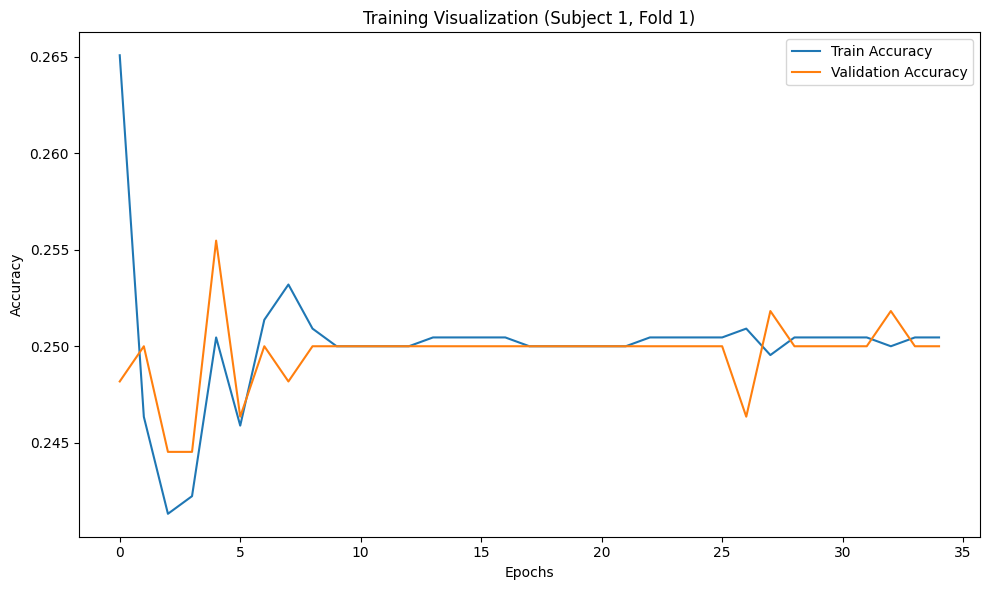

Fold 1: Accuracy = 25.55%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

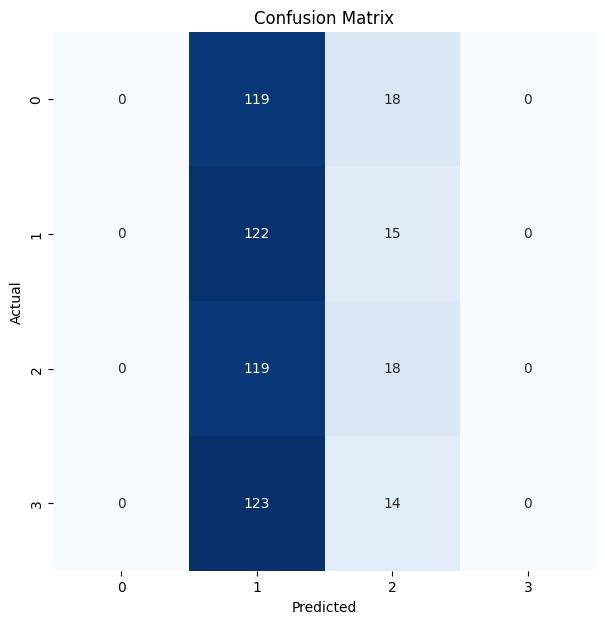

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       137
     Class 1       0.25      0.89      0.39       137
     Class 2       0.28      0.13      0.18       137
     Class 3       0.00      0.00      0.00       137

    accuracy                           0.26       548
   macro avg       0.13      0.26      0.14       548
weighted avg       0.13      0.26      0.14       548



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


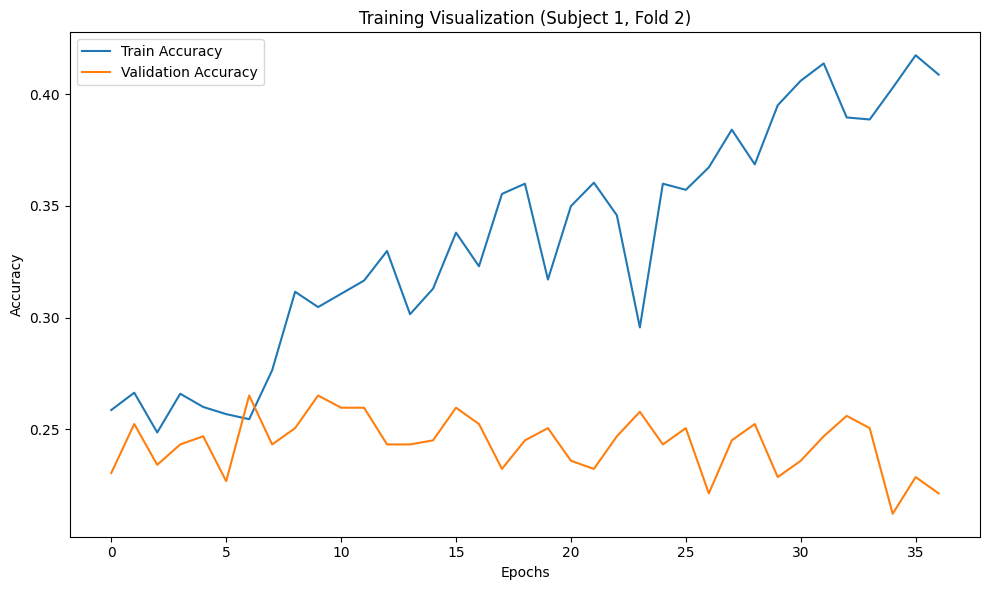

Fold 2: Accuracy = 26.51%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


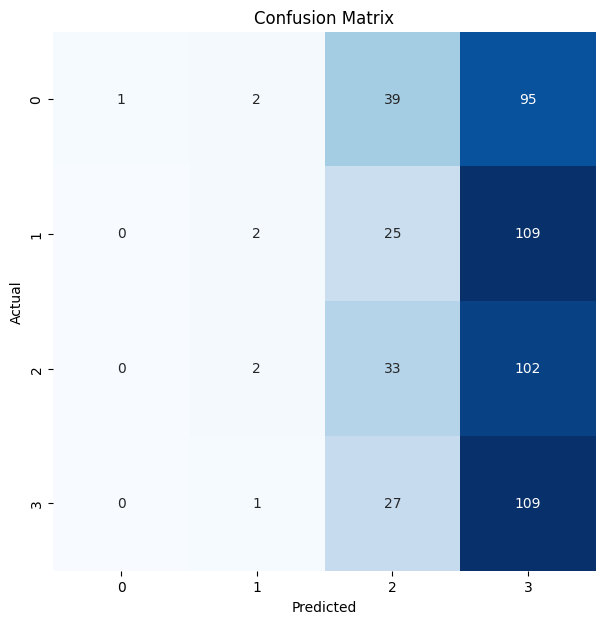

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.01      0.01       137
     Class 1       0.29      0.01      0.03       136
     Class 2       0.27      0.24      0.25       137
     Class 3       0.26      0.80      0.39       137

    accuracy                           0.27       547
   macro avg       0.45      0.26      0.17       547
weighted avg       0.45      0.27      0.17       547



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


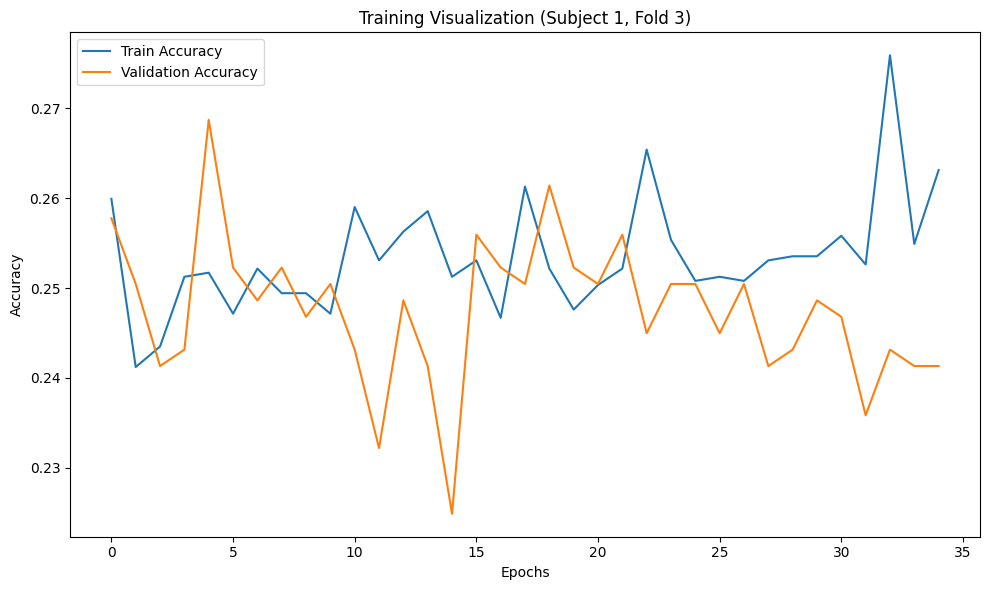

Fold 3: Accuracy = 26.87%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

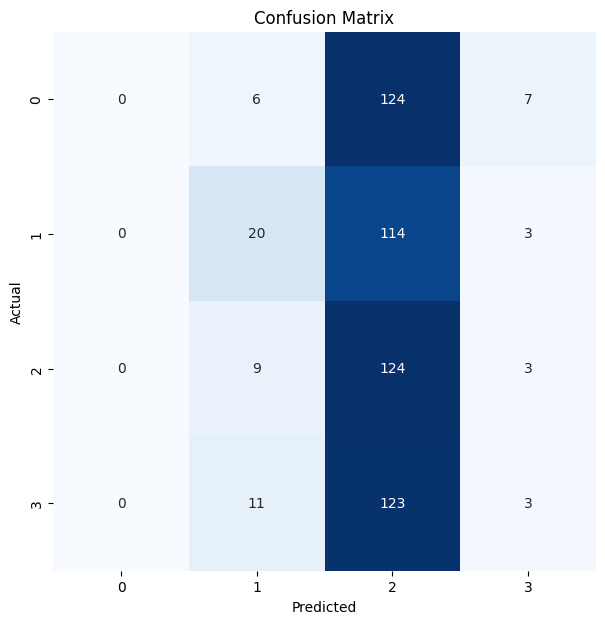

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       137
     Class 1       0.43      0.15      0.22       137
     Class 2       0.26      0.91      0.40       136
     Class 3       0.19      0.02      0.04       137

    accuracy                           0.27       547
   macro avg       0.22      0.27      0.16       547
weighted avg       0.22      0.27      0.16       547



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


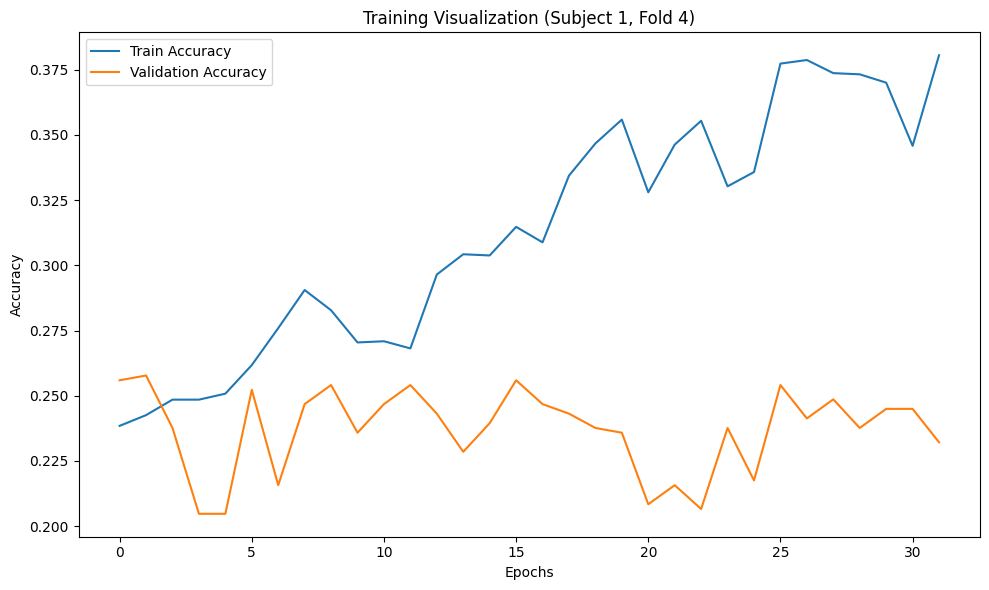

Fold 4: Accuracy = 25.78%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

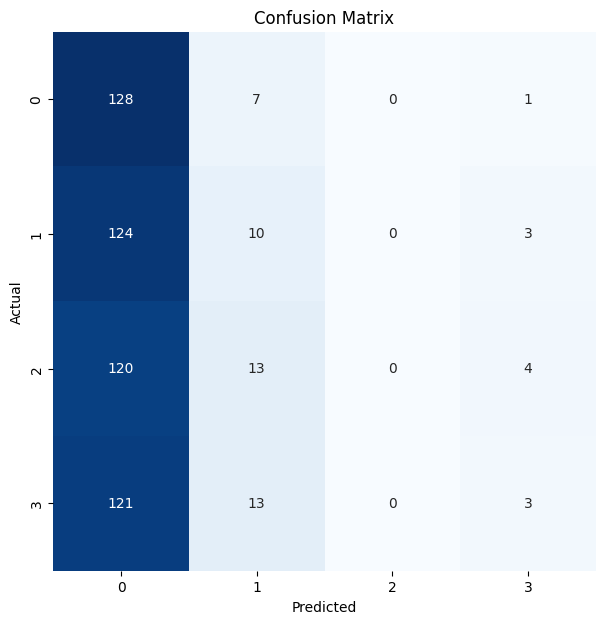

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.26      0.94      0.41       136
     Class 1       0.23      0.07      0.11       137
     Class 2       0.00      0.00      0.00       137
     Class 3       0.27      0.02      0.04       137

    accuracy                           0.26       547
   macro avg       0.19      0.26      0.14       547
weighted avg       0.19      0.26      0.14       547



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


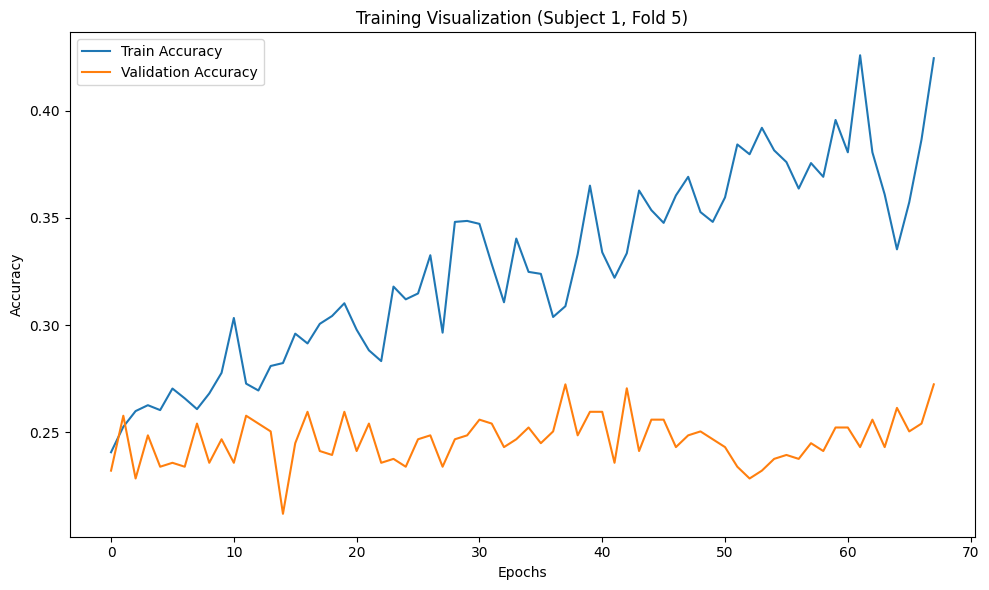

Fold 5: Accuracy = 27.24%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


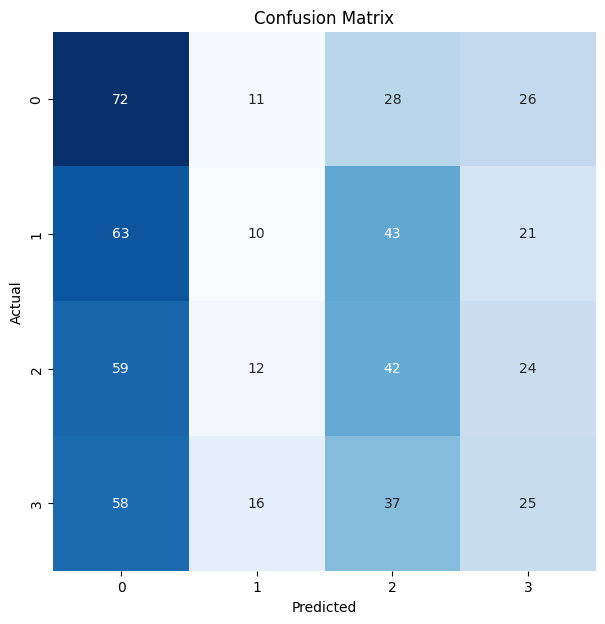

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.29      0.53      0.37       137
     Class 1       0.20      0.07      0.11       137
     Class 2       0.28      0.31      0.29       137
     Class 3       0.26      0.18      0.22       136

    accuracy                           0.27       547
   macro avg       0.26      0.27      0.25       547
weighted avg       0.26      0.27      0.25       547

Subject 1 completed in 764.14 seconds. Mean Accuracy: 26.39%, Std Dev: 0.64%
Experiment Complete!


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Constants
k_in_kfold = 5
batch = 128

acc_list = []
std_list = []
all_acc = []
acc_log = {}
flag_for_model_summary = 0

# Process data and train models for 15 subjects
for subject in range(1,2):  # 15 models for 15 subjects
    tf.keras.backend.clear_session()
    start = time.time()

    # Initialize `falx` and `one_y`
    falx = np.empty((0, 8, 9, 2048))
    for exp_id in range(1, 4):
        # Update path as needed
        temp = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
        falx = np.vstack([falx, temp])
    
    # Simulated labels for demonstration purposes
    one_y = np.random.randint(0, 4, size=(falx.shape[0],))
    one_y = tf.keras.utils.to_categorical(one_y, num_classes=4)  # Convert to one-hot encoding
    
    # Balance the dataset
    label_counts = np.unique(one_y.argmax(axis=1), return_counts=True)[1]
    min_count = np.min(label_counts)
    data_balance_diff = label_counts - min_count

    for label, diff in enumerate(data_balance_diff):
        if diff > 0:
            indices = np.where(one_y.argmax(axis=1) == label)[0]
            indices_to_remove = np.random.choice(indices, diff, replace=False)
            one_y = np.delete(one_y, indices_to_remove, axis=0)
            falx = np.delete(falx, indices_to_remove, axis=0)

    print("After data balancing:")
    print(f"one_y shape: {one_y.shape}, falx shape: {falx.shape}")
    print(f"Data balance: {np.unique(one_y.argmax(1), return_counts=True)}")

    # Train-test split using StratifiedKFold
    seed = 7
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
    cvscores = []

    for k, (train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
        input_shape = (8, 9, 2048)  # Update input shape to match data

        # Define the model
        def create_base_network(input_dim):
            model = Sequential()
            model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_dim))
            model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
            model.add(Conv2D(8, (1, 1), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(16, activation='relu'))
            return model

        base_network = create_base_network(input_shape)
        input_tensor = Input(shape=input_shape)
        output_tensor = Dense(4, activation='softmax')(base_network(input_tensor))
        model = Model(input_tensor, output_tensor)

        # Display model summary once
        if flag_for_model_summary == 0:
            model.summary()
            flag_for_model_summary = 1

        # Compile the model
        model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Prepare data
        x_train, x_test = falx[train], falx[test]
        y_train, y_test = one_y[train], one_y[test]

        # Train the model
        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=150,
                            batch_size=batch,
                            verbose=0,
                            callbacks=[
                                EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
                            ])

        # Plot training history
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training Visualization (Subject {subject}, Fold {k+1})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Evaluate the model
        scores = model.evaluate(x_test, y_test, verbose=0)
        print(f"Fold {k+1}: Accuracy = {scores[1] * 100:.2f}%")
        all_acc.append(scores[1] * 100)

        # Confusion matrix and classification report
        y_pred = model.predict(x_test).argmax(axis=1)
        cm = confusion_matrix(y_test.argmax(1), y_pred)
        clr = classification_report(y_test.argmax(1), y_pred, target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
        plt.figure(figsize=(7, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        print("Classification Report:\n", clr)

    # Store results
    mean_acc = np.mean(all_acc)
    std_acc = np.std(all_acc)
    acc_list.append(mean_acc)
    std_list.append(std_acc)
    acc_log[subject] = all_acc
    all_acc = []

    end = time.time()
    print(f"Subject {subject} completed in {end - start:.2f} seconds. Mean Accuracy: {mean_acc:.2f}%, Std Dev: {std_acc:.2f}%")

print("Experiment Complete!")


In [ ]:
##k_in_kfold = 5
##batch = 128

##acc_list = []
##std_list = []
##all_acc = []
##acc_log = {}
##flag_for_model_summary = 0
# with tf.device('/device:GPU:0'):
##for subject in range(1,16):  # 15 models for 15 subjects, no inter subject training, only intra subject
   ## K.clear_session()
   ## start = time.time()
    ##falx = np.empty((0, 8, 9, 2048))
    ##for exp_id in range(1,4):
    ##  temp = np.load('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy')
     ## falx = np.vstack([falx, temp])
    ##  temp = None

#     one_falx_1 = falx#.reshape(1008, 8, 9, 1280)

    # ###============= random select ============####
    # permutation = np.random.permutation(one_y_1.shape[0])
    # one_falx_2 = one_falx_1[permutation, :]
    # one_falx = one_falx_2[0:3400]
    # one_y_2 = one_y_1[permutation, :]
    # one_y = one_y_2[0:3400]
    # ###============= random select ============####
    ##one_y = one_y_1.copy()
#     one_falx = one_falx_1[:,:,:,:]

   ## print(f"lable count diff. with min. count:{data_balance_diff}")
   ## print(one_y.shape)
   ## print(falx.shape)
   ## print(f"data balance-> {np.unique(one_y.argmax(1), return_counts= True)}")

   ## for label,diff in enumerate(data_balance_diff):
    ##    y_argmax = one_y.argmax(1)
    ##    for m in range(diff):
     ##       index = np.random.randint(len(y_argmax)-1)
     ##       while y_argmax[index]!=label:
      ##          index = np.random.randint(len(y_argmax)-1)
     ##       y_argmax = np.delete(y_argmax, index, axis=0)
      ##      one_y = np.delete(one_y, index, axis=0)
      ##      falx = np.delete(falx, index, axis=0)

  ##  print("after data balancing")
  ##  print(one_y.shape)
  ##  print(falx.shape)
  ##  print(f"data balance-> {np.unique(one_y.argmax(1), return_counts= True)}")
   ## # x_train, x_test, y_train, y_test = train_test_split(one_falx, one_y, test_size=0.25)
 ##   seed = 7
  ##  np.random.seed(seed)
  ##  kfold = StratifiedKFold(n_splits=k_in_kfold, shuffle=True, random_state=seed)
  ##  cvscores = []


    # create model
   ## for k,(train, test) in enumerate(kfold.split(falx, one_y.argmax(1))):
    ##    img_size = (img_rows, img_cols, 2048)


     ##   def create_base_network(input_dim):

      ##      seq = Sequential()
      ##      seq.add(Conv2D(16, 3, activation='relu', padding='same', name='conv1',
                        ##   input_shape=input_dim))#, kernel_regularizer=keras.regularizers.l2(0.001)))
         ##   seq.add(Conv2D(32, 2, activation='relu', padding='same', name='conv2'))#, kernel_regularizer=keras.regularizers.l2(0.001)))
            # seq.add(Conv3D(32, 3, activation='relu', padding='same', name='conv3'))
         ##   seq.add(Conv2D(8, 1, activation='relu', padding='same', name='conv4'))
         ##   seq.add(MaxPooling2D(2, 2, name='pool1'))
         ##   seq.add(Flatten(name='fla1'))
         ##   seq.add(Dense(16, activation='relu', name='dense1'))#, kernel_regularizer=keras.regularizers.l2(0.01)))
#             seq.add(Reshape((1, 64), name='reshape'))

          ##  return seq




       ## base_network = create_base_network(img_size)
       ## input_1 = Input(shape=img_size)
#         input_2 = Input(shape=img_size)
#         input_3 = Input(shape=img_size)
#         input_4 = Input(shape=img_size)
#         input_5 = Input(shape=img_size)
#         input_6 = Input(shape=img_size)



#         out_all = Concatenate(axis=1)(base_network(input_1))
#         lstm_layer = LSTM(32, name='lstm')(out_all)
       ## out_layer = Dense(4, activation='softmax', name='out')(base_network(input_1))
       ## model = Model(input_1, out_layer)
        # model.summary()
       ## if flag_for_model_summary==0:
        ##  print(model.summary())
        ##  flag_for_model_summary = 1

        # Compile model
       ## model.compile(loss=keras.losses.categorical_crossentropy,
        ##              optimizer=tf.keras.optimizers.Adam(),
        ##              metrics=['accuracy'])
        # Fit the model
       ## x_train = falx[train]
       ## y_train = one_y[train]

       ## x_test = falx[test]
       ## y_test = one_y[test]

       ## history = model.fit(x_train, y_train,
                           ## validation_data=(x_test, y_test),
                           ## epochs=150, batch_size=batch, verbose=0,
                           ## callbacks=[
                                     ##     tf.keras.callbacks.EarlyStopping(
                                     ##         monitor='val_accuracy',
                                     ##         patience=30,
                                     ##         restore_best_weights=True
                                    ##      )
                                    ##  ])

      ##  plt.plot(history.history['accuracy'], label='acc (training data)')
      ##  plt.plot(history.history['val_accuracy'], label='acc (validation data)')
      ##  plt.plot(history.history['loss'], label='loss (training data)')
      ##  plt.plot(history.history['val_loss'], label='loss (validation data)')
      ##  plt.title('training visualisation')
      ##  plt.ylabel('Value')
      ##  plt.xlabel('No. epoch')
      ##  plt.legend()
      ##  plt.tight_layout()
      ##  plt.show()

        # evaluate the model

      ##  scores = model.evaluate(x_test, y_test, verbose=0)

      ##  print("%.2f%%" % (scores[1] * 100)) # Accuracy
      ##  all_acc.append(scores[1] * 100)

       ## y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))
       ## cm = confusion_matrix(y_test.argmax(1), y_pred)
       ## clr = classification_report(y_test.argmax(1), y_pred, target_names=(["0","1","2","3"]))
       ## plt.figure(figsize=(7, 7))
       ## sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
       ## plt.xticks(np.arange(4) + 0.5, (["0","1","2","3"]))
       ## plt.yticks(np.arange(4) + 0.5, (["0","1","2","3"]))
       ## plt.xlabel("Predicted")
       ## plt.ylabel("Actual")
       ## plt.title("Confusion Matrix")
       ## plt.show()
       ## print("Classification Report:\n----------------------\n", clr)

    ## print("mean acc: {}".format(np.mean(all_acc)))
##print("std acc: {}".format(np.std(all_acc)))
  ##  acc_list.append(np.mean(all_acc))
  ##  std_list.append(np.std(all_acc))
   ## print("subject_no.： {}".format(subject))
   ## acc_log[subject]  = all_acc
   ## all_acc = []
   ## end = time.time()
   ## print("%.2f" % (end - start))   # run time

In [3]:
print('Acc_all: {}'.format(acc_list))
print('Std_all: {}'.format(std_list))
print("Acc_mean: {}".format(np.mean(acc_list)))
print("Std_all: {}".format(np.std(std_list)))

Acc_all: [np.float64(26.389196515083313)]
Std_all: [np.float64(0.6411608425392888)]
Acc_mean: 26.389196515083313
Std_all: 0.0


In [4]:
print(acc_log)

{1: [25.547444820404053, 26.508226990699768, 26.873856782913208, 25.77696442604065, 27.239489555358887]}


In [ ]:
np.save('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy', acc_list)
np.save('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy', std_list)
np.save('/Users/manojamme/Desktop/MAJOR/seed_iv/my_extracted_features/spectrogram(224_224_3)/TL_inception_v3/1_3_X89.npy', acc_log)
